In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from typing import Dict, List, Tuple

In [2]:
TRACK_DIR = "./data/tracks.csv"
ARTIST_DIR= "./data/artists.csv"
AUDIO_DIR = "./data/features.csv"

### LOAD DATA

In [3]:
df_track_id   = pd.read_csv(TRACK_DIR, index_col=0)
df_feature_id = pd.read_csv(AUDIO_DIR, index_col=0)

df_track   = df_track_id.merge(df_feature_id, left_on="id", right_on="id")
df_artist  = pd.read_csv(ARTIST_DIR, index_col=0)

In [4]:
df_track.head()

,id,name,artists,available_markets,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,57pTcQBErlQjfe2kfzLffr,Caves,1ifC4znYCvmMSJ0rght5JS,NaN,False,0,0.554,0.318,3,-13.288,...,0.397000,0.1230,0.0565,130.110,audio_features,spotify:track:57pTcQBErlQjfe2kfzLffr,https://api.spotify.com/v1/tracks/57pTcQBErlQj...,https://api.spotify.com/v1/audio-analysis/57pT...,233240,4
1,3CFx8SBSwY8Q1IplDTQ6kB,Spanish Eyes,7egNqIGRldMzifHoh8pib6,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CH,CL,C...",False,48,0.515,0.490,2,-8.565,...,0.000046,0.0875,0.4950,109.290,audio_features,spotify:track:3CFx8SBSwY8Q1IplDTQ6kB,https://api.spotify.com/v1/tracks/3CFx8SBSwY8Q...,https://api.spotify.com/v1/audio-analysis/3CFx...,166867,4
2,6YWFr8BHQrRL4b7RwuqS36,Golden Boy,0QmOR0TqxMPtZxtaIJ5klY,"AD,AL,AR,AT,AU,BA,BE,BG,BO,BR,BY,CA,CH,CL,CO,C...",False,46,0.716,0.829,1,-5.370,...,0.000000,0.0705,0.7050,115.033,audio_features,spotify:track:6YWFr8BHQrRL4b7RwuqS36,https://api.spotify.com/v1/tracks/6YWFr8BHQrRL...,https://api.spotify.com/v1/audio-analysis/6YWF...,180586,4
3,4qJptAjwx2y7nZCOeXsSC9,Isabella,3ZXXJ9nO1Dn9B0AJ25eAQY,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",False,38,0.500,0.638,9,-7.291,...,0.000960,0.1150,0.3430,167.921,audio_features,spotify:track:4qJptAjwx2y7nZCOeXsSC9,https://api.spotify.com/v1/tracks/4qJptAjwx2y7...,https://api.spotify.com/v1/audio-analysis/4qJp...,249493,4
4,6vR3DSb5oiUlEXqymcQR5n,Svarta duvor & vissna liljor,"3kklzjWziqW7RX5jQjsRnb,4bOG1sx3QHFbOUVLNmMpPe",NaN,False,0,0.533,0.786,8,-4.278,...,0.000000,0.2400,0.4780,69.844,audio_features,spotify:track:6vR3DSb5oiUlEXqymcQR5n,https://api.spotify.com/v1/tracks/6vR3DSb5oiUl...,https://api.spotify.com/v1/audio-analysis/6vR3...,262000,3


In [5]:
df_artist.head()

,followers,genres,id,name,popularity
0,47349,"['canadian singer-songwriter', 'classic canadi...",5Jj4mqGYiplyowPLKkJLHt,Tom Cochrane,53
1,1434,[],1RHPoWCzOTCLxRgABHDQ9e,Rookie Season,30
2,466,[],21U625AUwj23OxpWcugsun,Bianca Rossini,19
3,12378,['classic rock'],4VmWYQQ5M9N9AiAx14v2yg,Aliotta Haynes Jeremiah,51
4,6694,['dutch r&b'],6jAydcjNjyqbeVY9LU6ImF,Wantigga,34


In [6]:
print("Tracks dataframe shape:  ", df_track.shape)
print("Artists dataframe shape: ", df_artist.shape)

Tracks dataframe shape:   (69162, 23)
Artists dataframe shape:  (24544, 5)


In [7]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69162 entries, 0 to 69161
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 69162 non-null  object 
 1   name               69157 non-null  object 
 2   artists            69162 non-null  object 
 3   available_markets  52960 non-null  object 
 4   explicit           69162 non-null  bool   
 5   popularity         69162 non-null  int64  
 6   danceability       69162 non-null  float64
 7   energy             69162 non-null  float64
 8   key                69162 non-null  int64  
 9   loudness           69162 non-null  float64
 10  mode               69162 non-null  int64  
 11  speechiness        69162 non-null  float64
 12  acousticness       69162 non-null  float64
 13  instrumentalness   69162 non-null  float64
 14  liveness           69162 non-null  float64
 15  valence            69162 non-null  float64
 16  tempo              691

In [8]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24544 entries, 0 to 24543
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   followers   24544 non-null  int64 
 1   genres      24544 non-null  object
 2   id          24544 non-null  object
 3   name        24544 non-null  object
 4   popularity  24544 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


### Giải thích các cột trong df_track
|STT|Tên cột|Ý nghĩa|
|---|---|---|
|0  |artists |ID Spotify của các nghệ sĩ trình bày ca khúc, cách nhau bởi dấu "," |
|1  |available_markets   |Các khu vực trên thế giới có thể nghe bài hát, mỗi nước là một code 2 chữ in hoa, cách nhau bởi dấu ","|
|2  |explicit            |True nếu bài hát chứa nội dung không phù hợp cho mọi đối tượng, ngược lại là False|
|3  |popularity          |Độ yêu thích, từ 0-100|
|4  |danceability        |Mức độ phù hợp của bài hát để nhảy, đo từ 0-1|
|5  |energy              |Mức độ sôi động của bài hát, đo từ 0-1|
|6  |key                 |Tông của bài hát, nếu không xác định, nhận giá trị là -1|
|7  |loudness            |Độ lớn db của bài hát từ -60 - 0|
|8  |mode                |1 cho biết bài hát viết theo "major", 0 là "minor"|
|9  |speechiness         |Từ 0-1, 0 có nghĩa bài hát không có lời, 1 có nghĩa bài hát có phần lời phức tạp|
|10 |acousticness        |Từ 0-1, khả năng bài hát có thể trình bày dưới dạng acoustic|
|11 |instrumentalness    |Từ 0-1, càng nhỏ cho thấy bài hát có phần lời ít|
|12 |liveness            |Từ 0-1, mức độ phù hợp để trình diễn trực tiếp|
|13 |valence             |Từ 0-1, mức độ tích cực của nội dung bài hát|
|14 |tempo               |Từ 0-1, độ nhanh của nhạc nền (số beat trên 1 phút)|
|15 |type            |Kiểu dữ liệu trả về khi gọi api, tất cả đều là "audio features"|
|16 |uri             |URI của bài hát|
|17 |track_href      |Link tới bài hát|
|18 |analysis_url    |Link tới phần đặc trưng âm thanh của bài hát|
|19 |duration_ms     |Độ dài bài hát|
|20 |time_signature  |Số beat của 1 câu trong bài hát|

### Giải thích các cột trong df_artist
|STT|Tên cột|Ý nghĩa|
|---|---|---|
|0  |followers |Số người theo dõi|
|1  |genres   |Thể loại theo đuổi, có dạng một list các str|
|2  |name            |Tên nghệ sĩ|
|3  |popularity          |Độ yêu thích, từ 0-100|

### Bỏ các dòng không có giá trị available markets

In [9]:
df_track = df_track.dropna(subset=["available_markets"])

In [10]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52960 entries, 1 to 69159
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52960 non-null  object 
 1   name               52960 non-null  object 
 2   artists            52960 non-null  object 
 3   available_markets  52960 non-null  object 
 4   explicit           52960 non-null  bool   
 5   popularity         52960 non-null  int64  
 6   danceability       52960 non-null  float64
 7   energy             52960 non-null  float64
 8   key                52960 non-null  int64  
 9   loudness           52960 non-null  float64
 10  mode               52960 non-null  int64  
 11  speechiness        52960 non-null  float64
 12  acousticness       52960 non-null  float64
 13  instrumentalness   52960 non-null  float64
 14  liveness           52960 non-null  float64
 15  valence            52960 non-null  float64
 16  tempo              529

In [11]:
df_track.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,52960.000000,5.296000e+04,52960.000000
mean,41.531495,0.547433,0.530125,5.232043,-10.975564,0.657364,0.133553,0.398790,0.191046,0.187761,0.430771,117.047008,2.643678e+05,3.848792
std,19.766221,0.188150,0.292735,3.563017,7.311791,0.474595,0.218238,0.369278,0.338346,0.159011,0.255433,31.227145,2.578945e+05,0.570509
min,0.000000,0.000000,0.000000,0.000000,-54.837000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000
25%,30.000000,0.430000,0.281000,2.000000,-14.050000,0.000000,0.036000,0.035100,0.000000,0.096800,0.223000,94.018750,1.799568e+05,4.000000
50%,43.000000,0.571000,0.565000,5.000000,-8.461000,1.000000,0.048700,0.282000,0.000191,0.122000,0.410000,116.966500,2.158800e+05,4.000000
75%,56.000000,0.686000,0.782000,8.000000,-5.756750,1.000000,0.097100,0.782000,0.171250,0.225000,0.624000,135.956000,2.656310e+05,4.000000
max,100.000000,0.981000,1.000000,11.000000,1.342000,1.000000,0.969000,0.996000,1.000000,0.993000,0.999000,230.781000,5.505831e+06,5.000000


### Chia dữ liệu thành train set, dev set và test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df_track, random_state=0, test_size=0.2)
df_test , df_dev = train_test_split(df_test, random_state=0 , test_size=0.5)

In [14]:
df_train.shape, df_dev.shape, df_test.shape

print("Train:", df_train.shape)
print("Dev:  ", df_dev.shape)
print("Test: ", df_test.shape)

Train: (42368, 23)
Dev:   (5296, 23)
Test:  (5296, 23)


### Phân tích về Popularity

In [15]:
pop = df_train.popularity.copy()
pop

42542    63
18998    49
15138    26
23134     8
15572    65
         ..
59898    56
68464    41
55604    34
56846    60
3529     47
Name: popularity, Length: 42368, dtype: int64

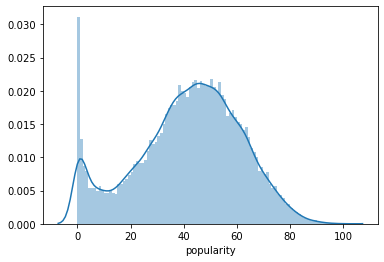

In [16]:
sns.distplot(pop, np.arange(0, 101));
# plt.savefig('./image/pop-dist.pn')

Có thể thấy dữ liệu nhìn chung có dạng phân phối chuẩn, tuy nhiên có một lượng lớn dữ liệu nằm ở đoạn 0-5

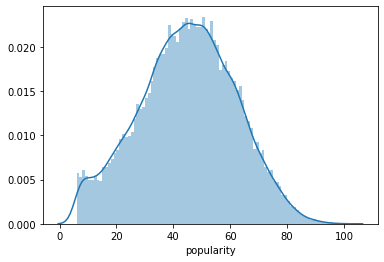

In [17]:
sns.distplot(pop[pop > 5], np.arange(0, 101));
plt.savefig('./image/popfrom5-dist.png')

Đồ thị phân phối của dữ liệu bỏ qua các điểm popularity 0-5

Xét hai phần dữ liệu riêng

In [18]:
first = df_train[pop <= 5]
second= df_train[pop >  5]

In [19]:
f = first.select_dtypes(["int64", "float64"])
s = second.select_dtypes(["int64", "float64"])

fs = pd.concat([f.mean(), s.mean(), f.std(), s.std()],axis=1)
fs.columns = columns=["<=5 mean", ">5 mean", "<=5 std", ">5 std"]
fs = fs.T
fs

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
<=5 mean,1.430186,0.597565,0.241285,5.520612,-19.227670,0.669548,0.616892,0.665487,0.063067,0.222740,0.384553,105.055782,504587.880652,3.518617
>5 mean,44.633028,0.543124,0.552208,5.206885,-10.333199,0.657063,0.096107,0.379053,0.200102,0.185245,0.433524,118.086586,246395.759756,3.874365
<=5 std,1.641795,0.166707,0.213409,3.644071,6.772403,0.470454,0.362059,0.293060,0.205988,0.166361,0.212407,35.805500,687928.729844,1.047739
>5 std,16.950027,0.189164,0.285867,3.555015,6.958044,0.474697,0.147097,0.366724,0.343669,0.158562,0.257625,30.670150,174069.176278,0.506211


Ta thấy ở các biến số, thì duration_ms có sự khác biệt lớn nhất giữa hai nhóm, các track có popularity <= 5 có độ dài biến thiên lớn, gồm các bài rất ngắn hoặc rất dài, trong khi các bài > 5 thì biến động ít hơn.

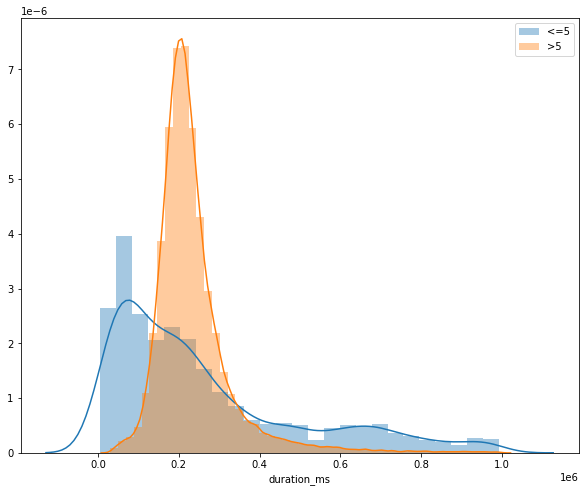

In [20]:
plt.figure(figsize=(10, 8))
sns.distplot(f[f.duration_ms <= 1e6].duration_ms, label="<=5")
sns.distplot(s[s.duration_ms <= 1e6].duration_ms, label=">5")
plt.legend();
plt.savefig('./image/popvsDuration-dist.png')


### Phân tích về các khu vực phát hành

Câu hỏi: việc có hoặc không phát hành tại mỗi khu vực có ảnh hưởng như thế nào đến độ yêu thích của bài hát.

Ích lợi: cho biết nên ưu tiên phát hành ở thị trường nào.

Do phần này thời gian chạy lâu nên em sẽ chỉ chạy trên một sample của df_train

In [21]:
df_train_sample = df_train.sample(5000, random_state=0)

In [22]:
df_01 = df_train_sample[["available_markets", "popularity"]].copy()
df_01["available_markets"] = df_01["available_markets"].apply(lambda x : x.split(","))
df_01

,available_markets,popularity
44589,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",48
58777,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",0
1388,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",54
12429,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",31
32246,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",32
...,...,...
8467,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",29
61563,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",73
56006,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",73
9074,"[CA, MX, US]",34


In [23]:
all_areas = df_01["available_markets"].explode().unique()

for a in all_areas:
    df_01[f"in_{a}"] = df_01["available_markets"].apply(lambda x : a in x)

cor    = df_01.corrwith(df_01.popularity).drop("popularity")
mean   = df_01.mean().drop("popularity")

In [24]:
result = pd.concat({"correlate": cor, "percent": mean}, axis=1)
result.nlargest(10, columns=["correlate"])

,correlate,percent
in_ME,0.217966,0.8584
in_RS,0.214627,0.8472
in_XK,0.214627,0.8472
in_US,0.094056,0.9104
in_JP,0.091610,0.8662
in_MX,0.076699,0.9178
in_SG,0.063622,0.9096
in_AL,0.060185,0.8918
in_MK,0.058947,0.8996
in_AU,0.058597,0.8914


In [25]:
result.describe()

,correlate,percent
count,92.000000,92.000000
mean,0.054499,0.903193
std,0.031885,0.012728
min,0.019247,0.847200
25%,0.044355,0.902600
50%,0.052283,0.906900
75%,0.054635,0.909300
max,0.217966,0.917800


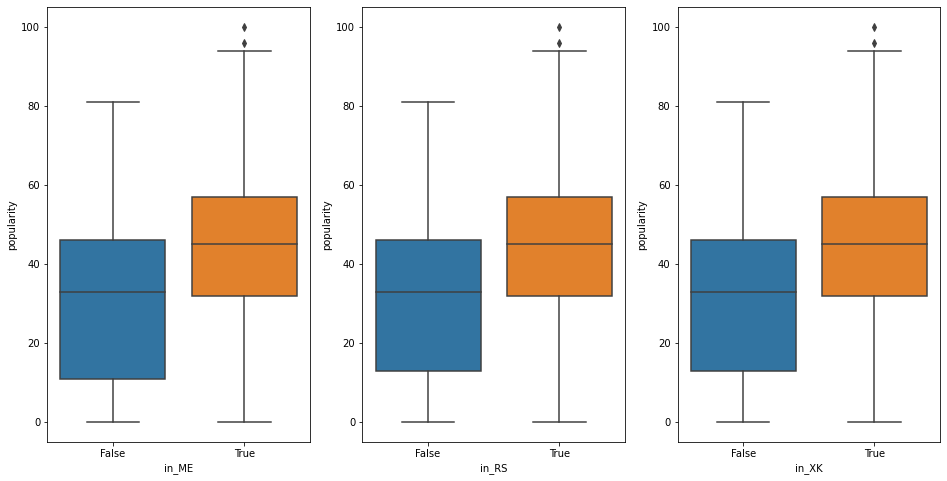

In [26]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 3, 1)
sns.boxplot(df_01["in_ME"], df_01["popularity"], ax=ax)
ax = plt.subplot(1, 3, 2)
sns.boxplot(df_01["in_RS"], df_01["popularity"], ax=ax)
ax = plt.subplot(1, 3, 3)
sns.boxplot(df_01["in_XK"], df_01["popularity"], ax=ax);

Ta thấy ở các khu đã xét, các bài hát được phát hành tại những nơi này có độ yêu thích trung bình lớn hơn so với trung bình những bài không được phát hành ở đây. Như vậy có thể xét các cột in_ME, in_RS, in_XK này khi tạo mô hình dự đoán

### Phân tích biến explicit

In [27]:
df_02 = df_train[["explicit", "popularity"]].copy()
df_02

,explicit,popularity
42542,False,63
18998,False,49
15138,False,26
23134,False,8
15572,False,65
...,...,...
59898,True,56
68464,False,41
55604,True,34
56846,False,60


In [28]:
print("Tỉ lệ giá trị True", df_02["explicit"].mean())

Tỉ lệ giá trị True 0.0969363670694864


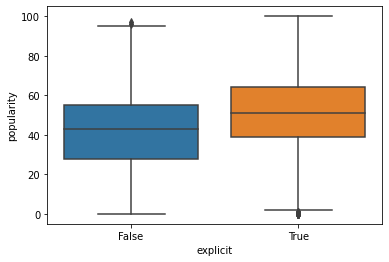

In [29]:
sns.boxplot(df_02["explicit"], df_02["popularity"]);
plt.savefig('./image/explicit.png')

Có sự khác nhau đối ở độ yêu thích giữa đối với bài hát explicit và không explicit, các bài hát explicit có độ yêu thích lớn hơn đáng kế, có thể giữ explicit là một đặc trưng để dự đoán

### Plot giữa các cột dữ liệu số

In [30]:
df_03 = df_train.select_dtypes(["int64", "float64"]).copy()
df_03

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42542,63,0.365,0.89200,4,-8.036,0,0.0786,0.000033,0.09480,0.7510,0.1760,136.133,323373,4
18998,49,0.388,0.00843,9,-31.898,0,0.0540,0.994000,0.91900,0.0861,0.1790,114.314,453267,4
15138,26,0.756,0.87000,11,-3.059,0,0.1200,0.353000,0.00000,0.4950,0.6540,130.005,166407,4
23134,8,0.276,0.05580,0,-23.893,0,0.0328,0.984000,0.96000,0.1000,0.0620,175.533,252733,3
15572,65,0.513,0.88000,7,-4.690,0,0.0309,0.000096,0.00614,0.0824,0.4950,92.358,269533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59898,56,0.866,0.79400,1,-5.085,1,0.2070,0.075300,0.00000,0.0910,0.2250,140.043,116612,4
68464,41,0.407,0.14800,2,-18.179,0,0.0325,0.930000,0.93300,0.1070,0.0495,103.590,329471,4
55604,34,0.509,0.95200,0,-4.625,1,0.1120,0.000167,0.02890,0.1660,0.6600,180.124,127926,4
56846,60,0.569,0.90100,9,-5.197,1,0.0544,0.005550,0.26000,0.1600,0.8390,133.194,259413,4


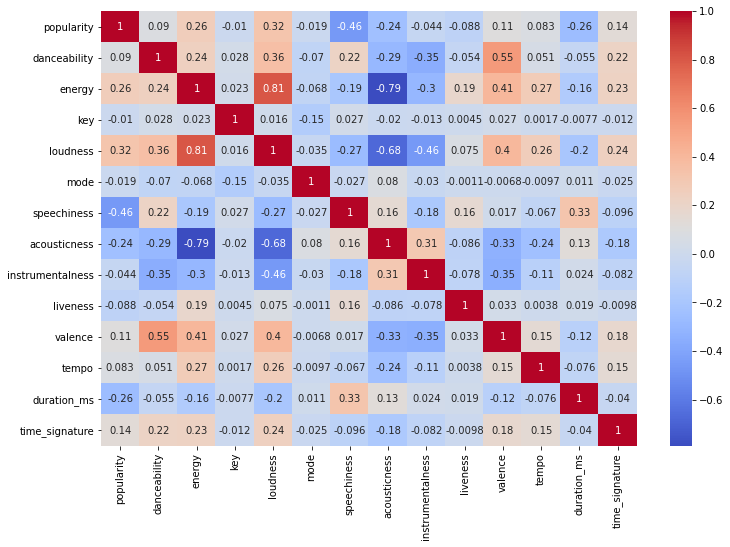

In [31]:
plt.figure(figsize=(12, 8))

sns.heatmap(df_03.corr(), cmap="coolwarm", annot=True);

plt.savefig('./image/heatmap.png')

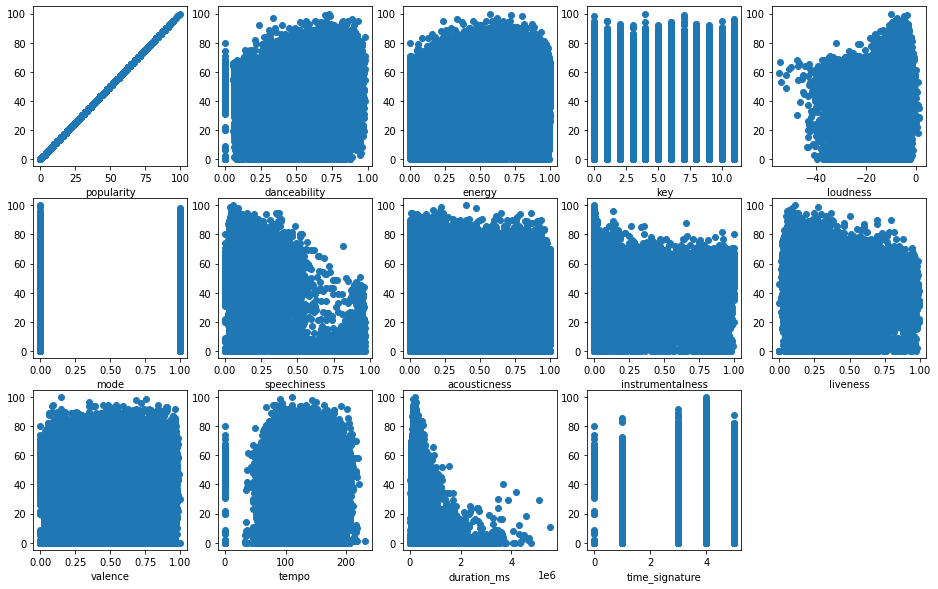

In [32]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df_03.columns):
    ax = plt.subplot(3, 5, i + 1)
    plt.scatter(df_03[col], df_03["popularity"])
    plt.xlabel(col)
plt.savefig('./image/scatter.png')

### Phân tích yếu tố số followers của artist

Độ yêu thích của một bài hát có thể phụ thuộc nhiều vào độ nổi tiếng của nghệ sĩ trình diễn bài hát đó. Một bài hát có thể có nhiều nghệ sĩ tham gia trình diễn, do đó ta sẽ thử ba cách để đưa tính đặc trưng followers của 1 bài hát: lượng follower trung bình, lượng follower nhỏ nhất và lượng follower lớn nhất.

In [33]:
df_04 = df_train[["id", "artists"]].copy()
df_04["artists"] = df_04["artists"].apply(lambda x : x.split(","))

In [34]:
df_04 = df_04.explode("artists")

In [35]:
df_track_follower = df_04.merge(df_artist[["id", "followers"]], left_on="artists", right_on="id", how="left")

In [36]:
df_track_follower.head()

,id_x,artists,id_y,followers
0,1wLQwg0mloy3yXjL0jPE0N,7jy3rLJdDQY21OgRLCZ9sD,7jy3rLJdDQY21OgRLCZ9sD,8212204.0
1,3DRu1GI6qvtVUDnygcTTj6,2wOqMjp9TyABvtHdOSOTUS,2wOqMjp9TyABvtHdOSOTUS,3570225.0
2,3DRu1GI6qvtVUDnygcTTj6,5Kb0Qf13EyYtVJvzCdI9M7,NaN,NaN
3,31zwmEokj7CXoY6elLIbMZ,0jnsk9HBra6NMjO2oANoPY,0jnsk9HBra6NMjO2oANoPY,7837167.0
4,31zwmEokj7CXoY6elLIbMZ,1RyvyyTE3xzB2ZywiAwp0i,1RyvyyTE3xzB2ZywiAwp0i,9612552.0


In [37]:
df_track_follower = df_track_follower.drop(columns="id_y")
df_track_follower.columns = ["id_track", "id_artists", "followers"]

In [38]:
df_track_follower

,id_track,id_artists,followers
0,1wLQwg0mloy3yXjL0jPE0N,7jy3rLJdDQY21OgRLCZ9sD,8212204.0
1,3DRu1GI6qvtVUDnygcTTj6,2wOqMjp9TyABvtHdOSOTUS,3570225.0
2,3DRu1GI6qvtVUDnygcTTj6,5Kb0Qf13EyYtVJvzCdI9M7,NaN
3,31zwmEokj7CXoY6elLIbMZ,0jnsk9HBra6NMjO2oANoPY,7837167.0
4,31zwmEokj7CXoY6elLIbMZ,1RyvyyTE3xzB2ZywiAwp0i,9612552.0
...,...,...,...
59405,7nIpGpMm3gSnL3QTrMisH7,181bsRPaVXVlUKXrxwZfHK,2750315.0
59406,46LJTikBnAJAzOJ3Hd3cxx,4zeFXE0vLwXYmvHTmHkpYL,40.0
59407,6JNIbZaVV9wkiv0ZNBfRrk,7tjMOkm52H3Qiz3ty2tbNw,32330.0
59408,7zjzu90Q4mtNNaE9Ol9Zbv,711MCceyCBcFnzjGY4Q7Un,17129975.0


In [39]:
track_follower_mean = df_track_follower.groupby("id_track")["followers"].mean()
track_follower_max  = df_track_follower.groupby("id_track")["followers"].max()
track_follower_min  = df_track_follower.groupby("id_track")["followers"].min()

#Thay các giá trị thiếu bằng trung vị của cột
track_follower_mean = track_follower_mean.fillna(track_follower_mean.median())
track_follower_max  = track_follower_max.fillna(track_follower_max.median())
track_follower_min  = track_follower_min.fillna(track_follower_min.median())

In [40]:
track_follower  = pd.concat({"mean" : track_follower_mean, "max" : track_follower_max, "min" : track_follower_min}, axis=1)

In [41]:
track_follower

,mean,max,min
id_track,,,
00045lJN8ym35dThqegEHq,538.0,538.0,538.0
001UkMQHw4zXfFNdKpwXAF,2821149.0,3967710.0,1674588.0
001eyxfoYptAWzvF4ewLrR,437218.0,437218.0,437218.0
002iHpz1z9UbrIzJ8xcx3M,2.0,2.0,2.0
0038p5duwZ3euoTDxmizmF,5082.0,5082.0,5082.0
...,...,...,...
7zvwxa2s4zIX7y49plhrmo,334385.0,334385.0,334385.0
7zxRMhXxJMQCeDDg0rKAVo,14489818.0,26692409.0,2287227.0
7zxYEpPy4av7DA0jEgmHde,1102.0,1723.0,481.0


In [42]:
pop = df_train[["id","popularity"]].copy()

In [43]:
df_tmp = pop.merge(track_follower, left_on="id", right_index=True)

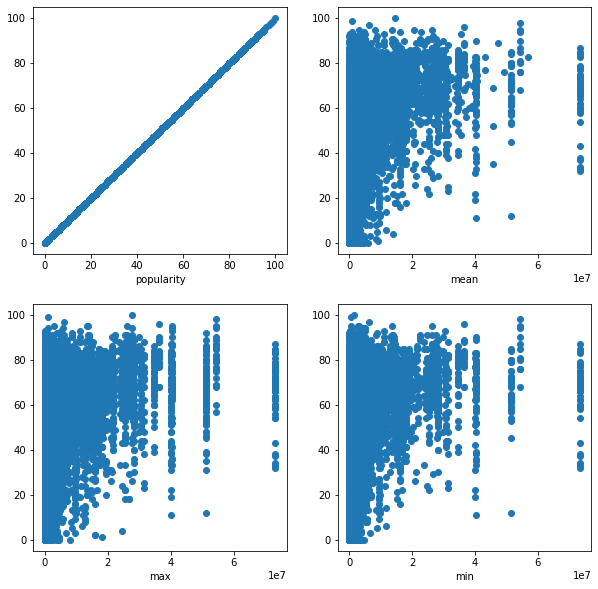

In [44]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(["popularity", "mean", "max", "min"]):
    ax = plt.subplot(2, 2, i + 1)
    plt.scatter(df_tmp[col], df_tmp["popularity"])
    plt.xlabel(col)
plt.savefig('./image/artist-scatter.png')

Các đường thẳng có thể giải thích là các bài hát khác nhau của cùng một nghệ sĩ

In [45]:
df_tmp.corr()["popularity"].sort_values(ascending=False)

popularity    1.000000
max           0.312945
mean          0.311622
min           0.282141
Name: popularity, dtype: float64

Như vậy giá trị tương quan nhất với độ nổi tiếng là số follower lớn nhất trong các nghệ sĩ biểu diễn